Forecasted EV Registrations (2024 to 2030):
{2023: 67201.03132087408, 2024: 89869.39159375604, 2025: 120184.27971540854, 2026: 160725.03479277057, 2027: 214941.06276051825, 2028: 287445.3287267175, 2029: 384406.85062988225, 2030: 514075.58948948036}


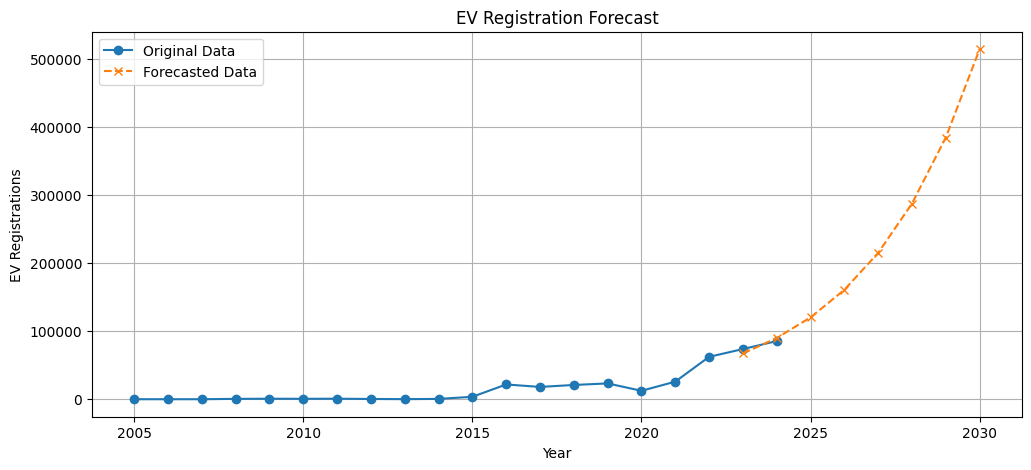

In [82]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Data provided
data = {
    2005: 3, 2006: 1, 2007: 1, 2008: 530, 2009: 724, 2010: 614,
    2011: 741, 2012: 369, 2013: 115, 2014: 46, 2015: 3564, 2016: 21686,
    2017: 18042, 2018: 20951, 2019: 23222, 2020: 12377, 2021: 25807,
    2022: 62247, 2023: 73678, 2024: 85380
}

# Converting the data into a pandas Series
ev_registration_counts = pd.Series(data)

# Define exponential growth function
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# Prepare the dataset, excluding 2024 if we are forecasting beyond it
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2024]

# Prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# Fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# Forecast for 2025 to 2030
forecast_years = np.arange(2023, 2023 + 8) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# Create a dictionary to display the forecasted values
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

# Print the forecasted values
print("Forecasted EV Registrations (2024 to 2030):")
print(forecasted_evs)

# Plot the results
plt.figure(figsize=(12, 5))
plt.plot(filtered_years.index, filtered_years.values, label='Original Data', marker='o')
plt.plot(forecasted_evs.keys(), forecasted_evs.values(), label='Forecasted Data', linestyle='--', marker='x')
plt.xlabel('Year')
plt.ylabel('EV Registrations')
plt.title('EV Registration Forecast')
plt.legend()
plt.grid(True)
plt.show()


To find the accuracy of predicted model excluding the diifrent ecomnomic and social factors


Mean Absolute Error (MAE): 4808.5828687921185
Mean Squared Error (MSE): 47908855.85786195
R-squared (R²): 0.9266185949718653


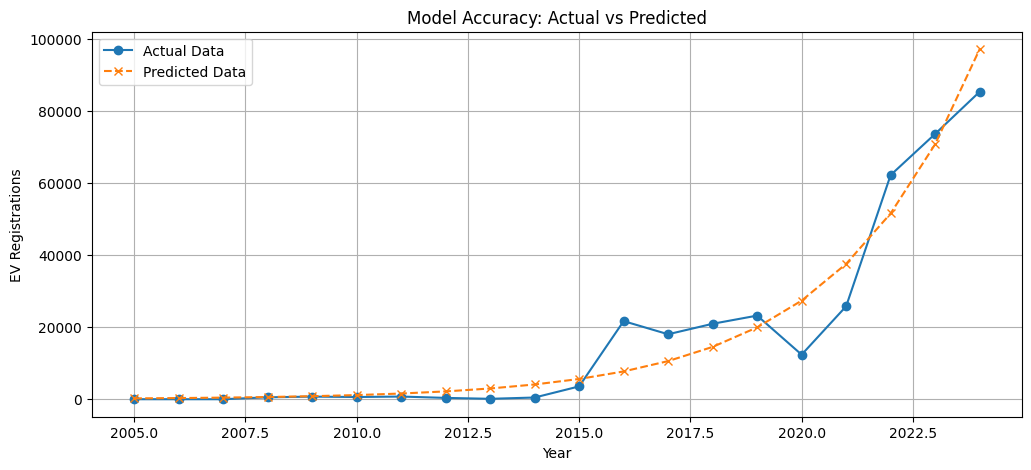

In [83]:
 # Import necessary libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prepare training data (up to 2022 for training)
train_years = ev_registration_counts[ev_registration_counts.index < 2023]
x_train = train_years.index - train_years.index.min()
y_train = train_years.values

# Fit the model to the training data
params, covariance = curve_fit(exp_growth, x_train, y_train)

# Predict for the years in the dataset
x_test = ev_registration_counts.index - ev_registration_counts.index.min()
y_test = ev_registration_counts.values
y_pred = exp_growth(x_test, *params)

# Calculate accuracy metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print accuracy metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")
plt.figure(figsize=(12, 5))
plt.plot(ev_registration_counts.index, y_test, label="Actual Data", marker='o')
plt.plot(ev_registration_counts.index, y_pred, label="Predicted Data", linestyle='--', marker='x')
plt.xlabel('Year')
plt.ylabel('EV Registrations')
plt.title('Model Accuracy: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()
